<br>
<img src="data/airbnb_logo.png" alt="Logo de Airbnb" style="width:300px"/><br>

# **Airbnb Case**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: ggalvanjorge@gmail.com

---
## **Análisis de nómadas digitales como clientes potenciales**

<img src="https://news.airbnb.com/wp-content/uploads/sites/4/2020/11/PJM013418Q324-DTLA_Loft-00234_JL1-1.jpg?w=1024" width="500">

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
El siguiente estudio busca examinar un nuevo de clientes emergentes para Airbnb: los nómadas digitales. Este análisis pretende conocer la situación actual de la ciudad y su capacidad para dar demanda a este segmento.
</div>

## **1 - Análisis inicial de la situación**

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lectura del dataset sin outliers
df_listings = pd.read_csv('./data/listings_clean.csv')
df_listings = df_listings.drop('Unnamed: 0', axis = 'columns') # Eliminación de la columna 'Unnamed: 0'
df_listings.sample(3)

,id,name,latitude,longitude,minimum_nights,amenities,last_review,room_type,price,neighbourhood_cleansed,host_id,bedrooms,accommodates,review_scores_rating,review_scores_location,review_scores_checkin
1298,18392202,Riant woon-werkhuis aan groene rand van Amsterdam,52.30448,4.97025,14,"[""Pocket wifi"", ""Microwave"", ""Private entrance...",2022-06-12,Entire home/apt,135.0,Gaasperdam - Driemond,12610858,3.0,4,5.0,5.00,5.00
3552,618792278700004666,6 Persons Private Room Amsterdam.,52.38496,4.92331,1,"[""Wifi"", ""Fire extinguisher"", ""Heating"", ""Long...",2022-08-07,Private room,116.0,Oud-Noord,456100596,1.0,6,3.0,3.25,4.25
4212,694774038589729284,Tiny house met jacuzzi 15 minuten van Amsterdam.,52.44016,4.87381,1,"[""Microwave"", ""Free street parking"", ""Fire pit...",2022-09-06,Entire home/apt,99.0,Noord-West,121845384,1.0,2,4.6,4.40,4.80


### 1.1 - Distribución de viviendas con y sin espacio dedicado

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Los nómadas digital valoran muy positivamente contar con un espacio de trabajo en la vivienda, por lo que el análisis se inicia en esta característica.
</div>

In [3]:
# Condición para filtrar por las viviendas que cuentan con espacio de trabajo
cond_ws = df_listings['amenities'].str.contains('Dedicated workspace', regex=False, case=False)

df_ws = df_listings[cond_ws] # Dataframe con espacios de trabajo
df_no_ws = df_listings[-cond_ws] # Dataframe sin espacios de trabajo

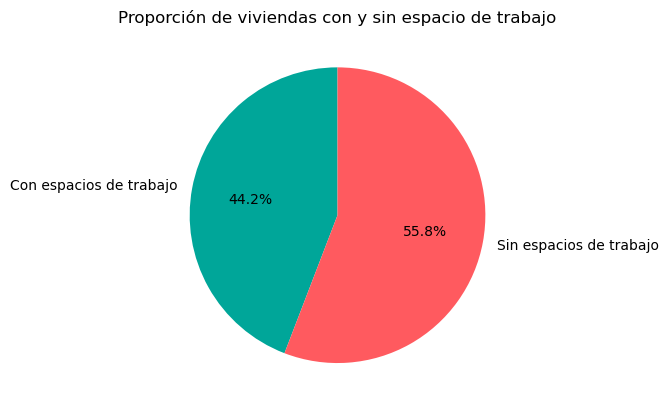

In [4]:
# Nº de viviendas con y sin espacio de trabajo
n_ws = len(df_ws)
n_no_ws = len(df_no_ws)

# Gráfico circular con la proporción de viviendas con y sin espacio de trabajo
plt.pie([n_ws, n_no_ws], labels=['Con espacios de trabajo','Sin espacios de trabajo'], autopct='%1.1f%%', startangle=90, colors=['#00A699','#FF5A5F'])

# Título del gráfico
plt.title('Proporción de viviendas con y sin espacio de trabajo');

### 1.2 - Correlación de las variables númericas en las viviendas con espacio de trabajo

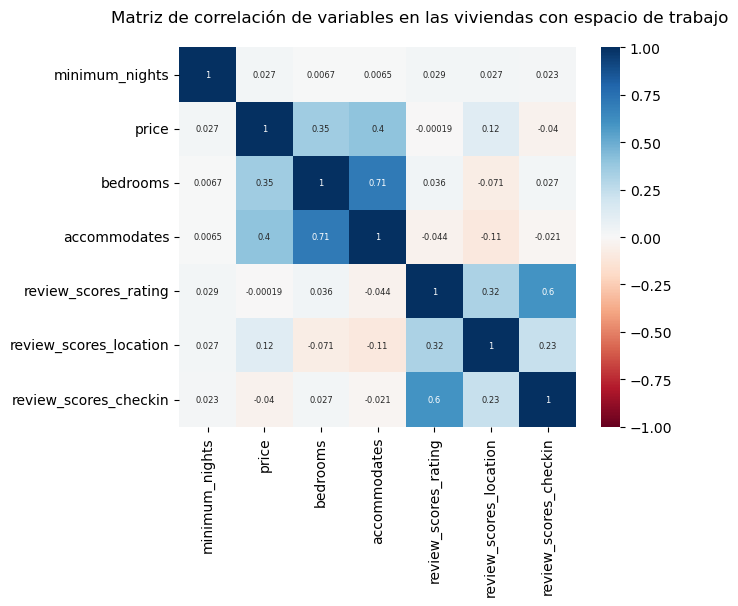

In [5]:
numerical = df_ws.select_dtypes(exclude = 'object') # Selección de variables numéricas
numerical = numerical.loc[:, ~numerical.columns.isin(['id', 'host_id', 'latitude', 'longitude'])] # Exclusión de las variables de id, latitud y longitud

# Matriz de correlación de variables numéricas de las viviendas con espacio de trabajo
corr_matrix = numerical.corr()

# Mapa de calor con la matriz de correlación de variables numéricas de viviendas con espacio de trabajo
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', annot_kws={"size": 6}, vmin=-1)

# Título del gráfico
plt.suptitle('Matriz de correlación de variables en las viviendas con espacio de trabajo')
plt.subplots_adjust(top=0.9) # Ajuste del espacio entre el título y la figura

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
La matriz de correlación muestra que las relaciones encontradas respaldan la intuición, como la correlación positiva entre el precio, el número de habitaciones y la capacidad de alojamiento. Además, hay una correlación positiva de la puntuación general con las demás variables de calificación, revelando una consistencia en las valoraciones de los huéspedes en diferentes aspectos.
</div>

### 1.3. Barrios con mayor oferta de viviendas con espacio de trabajo

In [6]:
# Nº de viviendas con espacio de trabajo tras agrupar por barrio
df_ws_neighbourhood = df_ws.groupby('neighbourhood_cleansed').agg({'amenities':'count'})
df_ws_neighbourhood = df_ws_neighbourhood.rename(columns={'amenities':'n_housing'})
df_ws_neighbourhood = df_ws_neighbourhood.reset_index().sort_values(by='n_housing', ascending=False)

df_ws_neighbourhood.head(5)

,neighbourhood_cleansed,n_housing
7,De Baarsjes - Oud-West,254
5,Centrum-West,224
8,De Pijp - Rivierenbuurt,213
4,Centrum-Oost,160
20,Westerpark,131


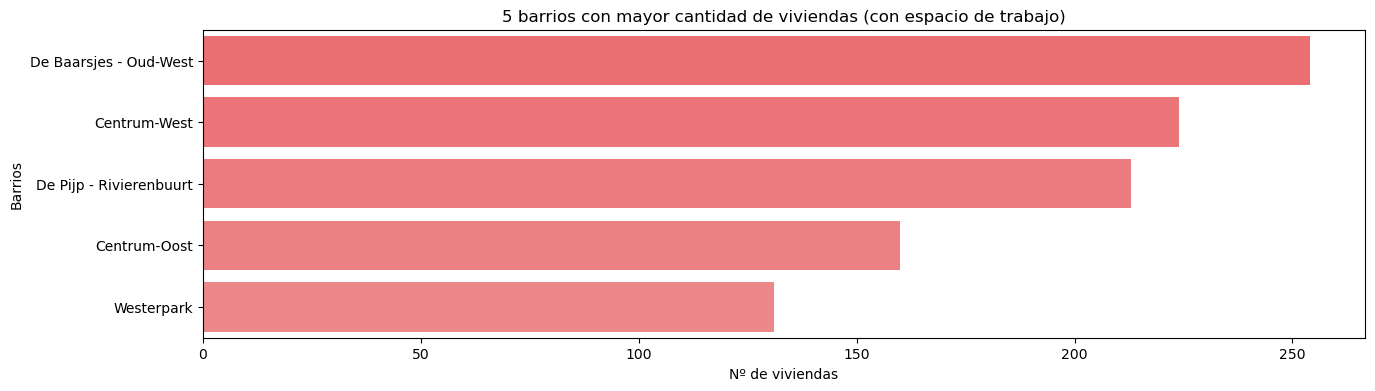

In [7]:
# Paleta de colores del gráfico
palette = sns.light_palette("#FF5A5F", n_colors=len(df_ws_neighbourhood))
palette = list(reversed(palette)) # Inversión del orden de los colores de la paleta

# Gráfico de barras con los 5 barrios con más viviendas con espacio de trabajo
sns.barplot(data=df_ws_neighbourhood.head(5), x='n_housing', y='neighbourhood_cleansed', palette=palette)

plt.gcf().set_size_inches(15,4) # Ajuste del alto y ancho del gráfico

# Título y etiquetas de los ejes
plt.title('5 barrios con mayor cantidad de viviendas (con espacio de trabajo)')
plt.xlabel('Nº de viviendas')
plt.ylabel('Barrios')

plt.show()

### 1.4 - Distribución de la oferta según los tipos de habitación con espacio de trabajo

In [8]:
list_ws_neighbourhood = df_ws_neighbourhood.head(5)

# Lista con los barrios con mayor oferta de viviendas con espacio de trabajo
list_ws_neighbourhood = list_ws_neighbourhood.loc[:,'neighbourhood_cleansed']
list_ws_neighbourhood = list_ws_neighbourhood.tolist()

In [9]:
# Concidición para filtrar el dataframe con espacios de trabajo por los barrios con mayor oferta
cond_room_type = df_ws['neighbourhood_cleansed'].isin(list_ws_neighbourhood)

df_ws_neighbourhood_room = df_ws[cond_room_type]

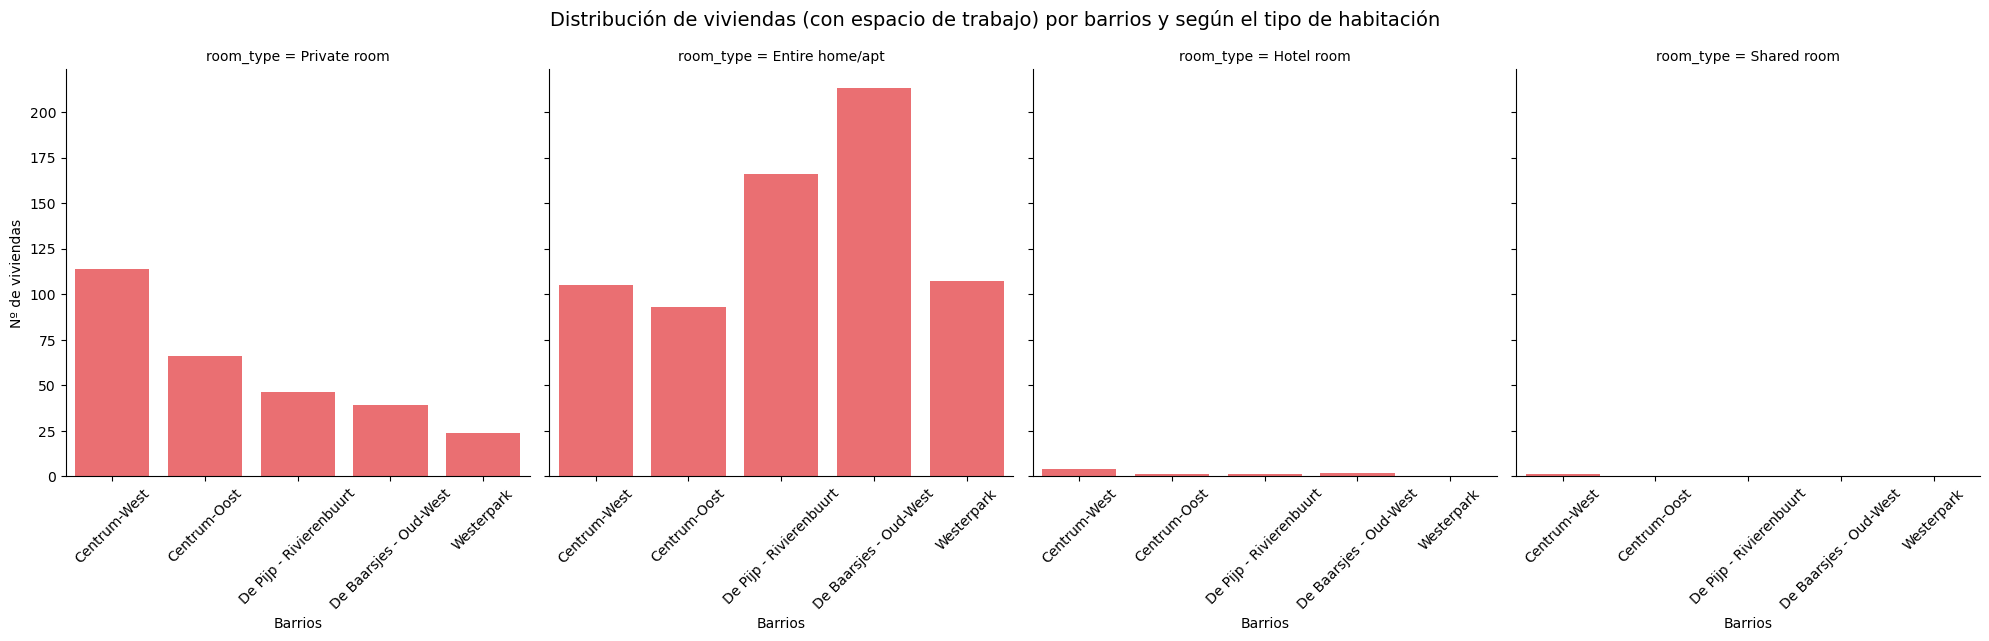

In [10]:
# Gráficos de barras con la distribución de la oferta con espacio de trabajo por barrio y según el tipo de habitación
ax = sns.catplot(data=df_ws_neighbourhood_room, x='neighbourhood_cleansed', col='room_type', kind='count', color='#FF5A5F')
ax.set_xticklabels(rotation = 45) # Rotación de las etiquetas del eje X para una mejor visualización

# Título y etiquetas de los ejes
ax.fig.suptitle('Distribución de viviendas (con espacio de trabajo) por barrios y según el tipo de habitación', fontsize=14, y=1.05)
ax.set_axis_labels('Barrios', 'Nº de viviendas');

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Es recomendable centrarse en los alojamientos enteros, en los apartamentos o en las habitaciones privadas, que es dónde se concentra la oferta.
Las habitaciones de hotel y las habitaciones compartidas no representan una muestra suficiente como para enfocar acciones a estos tipos de habitación.
</div>

In [11]:
# Condición para eliminar los hoteles y las habitaciones compartidas al no cumplir estos tipos de habitación con la demanda de los nómadas digitales y al ser una muestra tan pequeña
cond_room_1 = df_ws['room_type'] == 'Entire home/apt'
cond_room_2 = df_ws['room_type'] == 'Private room'

# Filtro para seleccionar los dos tipos de habitación más habituales y así focalizar las acciones en este tipo de viviendas
df_ws = df_ws[cond_room_1 | cond_room_2] 

### 1.5. Distribución del precio con espacio de trabajo

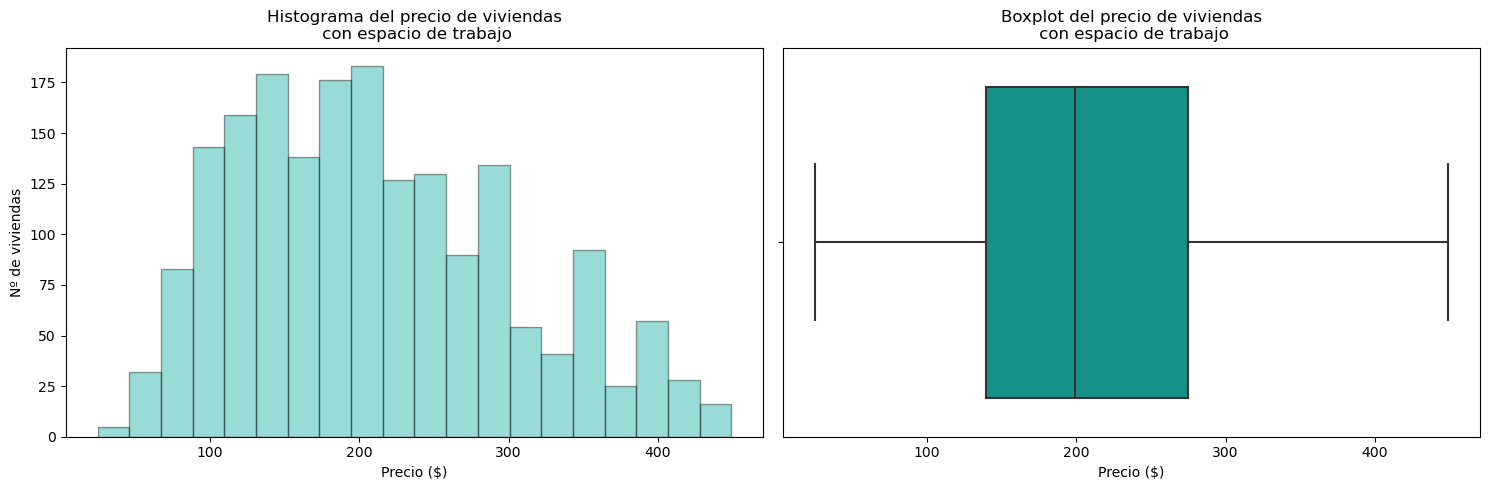

In [12]:
# Figura con dos subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Histograma con la distribución del precio de las viviendas con espacio de trabajo
sns.distplot(df_ws['price'], bins=20, kde=False, hist_kws={'edgecolor':'black'}, color='#00A699', ax=ax1)
# Título y etiquetas de los ejes
ax1.set_title('Histograma del precio de viviendas\n con espacio de trabajo')
ax1.set_xlabel('Precio ($)')
ax1.set_ylabel('Nº de viviendas')

# Boxplot con la distribución del precio de las viviendas con espacio de trabajo
sns.boxplot(df_ws['price'], orient='horizontal', color='#00A699', ax=ax2)
# Título y etiquetas de los ejes
ax2.set_title('Boxplot del precio de viviendas\n con espacio de trabajo')
ax2.set_xlabel('Precio ($)')

# Ajuste de la disposición de los subplots
plt.tight_layout()

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
La distribución de los precios de los alojamientos indica que la mayor concentración de precios es entre 100 y 250 $. 
Por lo tanto, resulta interesante llevar a cabo las acciones en los alojamientos cuyo precio sea alto ya que son los que más beneficio generan, especialmente porque los nómadas digitales tienden a tener una estancia más larga.
</div>

### 1.6 - Barrios con precio medio más caro

In [13]:
# Precio medio de las viviendas con espacio de trabajo de cada barrio
df_ws_neighbourhood_price = df_ws.groupby('neighbourhood_cleansed').agg({'price':'mean'})
df_ws_neighbourhood_price = df_ws_neighbourhood_price.reset_index().sort_values(by='price', ascending=False)
df_ws_neighbourhood_price = round(df_ws_neighbourhood_price, 2)

df_ws_neighbourhood_price.head(5)

,neighbourhood_cleansed,price
21,Zuid,239.73
4,Centrum-Oost,232.31
5,Centrum-West,228.68
8,De Pijp - Rivierenbuurt,227.50
7,De Baarsjes - Oud-West,221.71


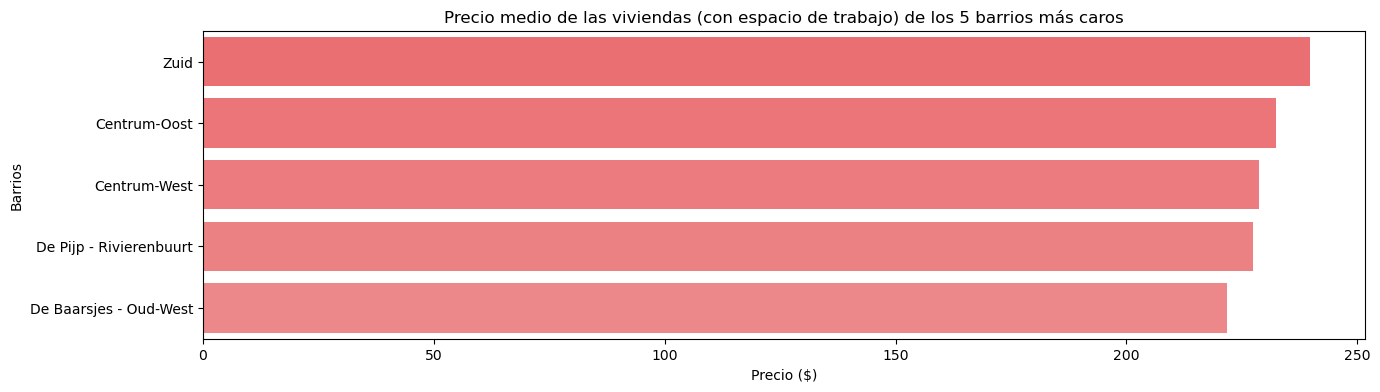

In [14]:
# Paleta de colores del gráfico
palette = sns.light_palette("#FF5A5F", n_colors=len(df_ws_neighbourhood))
palette = list(reversed(palette)) # Inversión del orden de los colores de la paleta

# Gráfico de barras con el precio medio de las viviendas con espacio de trabajo de los 5 barrios más caros
sns.barplot(data=df_ws_neighbourhood_price.head(5), x='price', y='neighbourhood_cleansed', palette=palette)

plt.gcf().set_size_inches(15,4) # Ajuste del alto y ancho del gráfico

# Título y etiquetas de los ejes
plt.title('Precio medio de las viviendas (con espacio de trabajo) de los 5 barrios más caros')
plt.xlabel('Precio ($)')
plt.ylabel('Barrios')

plt.show()

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Se observa que el segundo barrio con el mayor número de alojamientos que ofrecen espacio de trabajo (Centrum West) se encuentra también en el top 2 de precios de alojamientos. Por lo tanto, Centrum West se posiciona como el barrio más atractivo.
</div>

### 1.7 - Relación entre el nº de viviendas con espacio de trabajo y el precio por barrio

In [15]:
# Combinación del dataframe del nº de viviendas de los barrios con el del precio medio de los barrios
df_ws_neighbourhood_n_price = df_ws_neighbourhood.merge(df_ws_neighbourhood_price, how='left', left_on='neighbourhood_cleansed', right_on='neighbourhood_cleansed')
df_ws_neighbourhood_n_price.head(5)

,neighbourhood_cleansed,n_housing,price
0,De Baarsjes - Oud-West,254,221.71
1,Centrum-West,224,228.68
2,De Pijp - Rivierenbuurt,213,227.50
3,Centrum-Oost,160,232.31
4,Westerpark,131,215.98


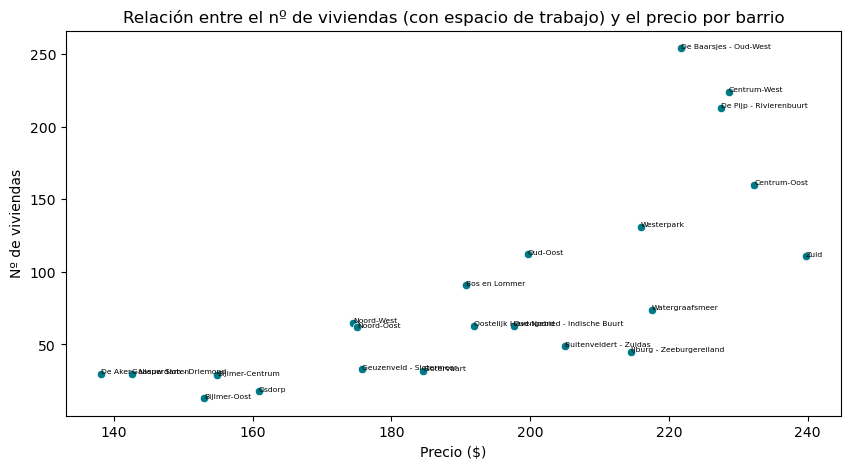

In [16]:
# Gráfico de disperación con la relación entre el nº de viviendas con espacio de trabajo y el precio por barrio
fig, ax = plt.subplots(figsize = (10,5)) # Ajuste del alto y ancho del gráfico
sns.scatterplot(data=df_ws_neighbourhood_n_price, x='price', y='n_housing', color='#007A87')

n = df_ws_neighbourhood_n_price['neighbourhood_cleansed']

# Bucle para agregar el barrio al que corresponde cada punto
for i, txt in enumerate(n):
    ax.annotate(txt, (df_ws_neighbourhood_n_price['price'][i], df_ws_neighbourhood_n_price['n_housing'][i]), fontsize=5.5)

# Título y etiquetas de los ejes
plt.title('Relación entre el nº de viviendas (con espacio de trabajo) y el precio por barrio')
plt.xlabel('Precio ($)')
plt.ylabel('Nº de viviendas')

plt.show()

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
A medida que aumenta la oferta de viviendas con espacio de trabajo, también se observa un incremento en los precios. 
Estos barrios se vuelven más cotizados debido a varios factores, entre ellos, la creciente tendencia de los nómadas digitales.
</div>

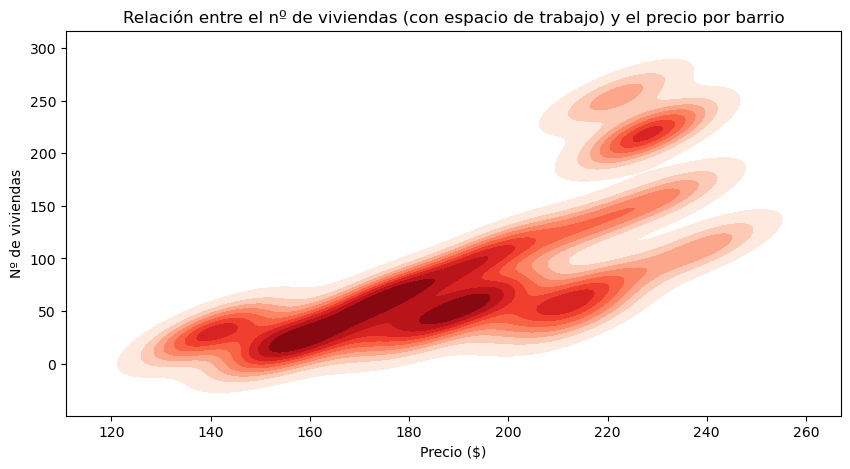

In [17]:
# Diagrama de contorno con la relación entre el nº de viviendas con espacio de trabajo y el precio por barrio
fig, ax = plt.subplots(figsize = (10,5)) # Ajuste del alto y ancho del gráfico
sns.kdeplot(data=df_ws_neighbourhood_n_price, x='price', y='n_housing', cmap='Reds', shade=True, bw_adjust=0.5)

# Título y etiquetas de los ejes
plt.title('Relación entre el nº de viviendas (con espacio de trabajo) y el precio por barrio')
plt.xlabel('Precio ($)')
plt.ylabel('Nº de viviendas')

plt.show()

### 1.8 - Ratio de la oferta y el precio entre viviendas con y sin espacio de trabajo

In [18]:
# Nº de viviendas con espacio de trabajo y la mediana del precio tras agrupar por barrio
df_offer_ws = df_ws.groupby('neighbourhood_cleansed').agg({'id':'count','price':'median'})
df_offer_ws = df_offer_ws.rename(columns={'id':'n_housing'})
df_offer_ws = df_offer_ws.reset_index().sort_values(by='n_housing', ascending=False)

In [19]:
# Nº de viviendas sin espacio de trabajo y la mediana del precio tras agrupar por barrio
df_offer_no_ws = df_no_ws.groupby('neighbourhood_cleansed').agg({'id':'count','price':'median'})
df_offer_no_ws = df_offer_no_ws.rename(columns={'id':'n_housing'})
df_offer_no_ws = df_offer_no_ws.reset_index().sort_values(by='n_housing', ascending=False)

In [20]:
# Combinación de los dos dataframes generados
df_offer = df_offer_ws.merge(df_offer_no_ws, how='left', left_on='neighbourhood_cleansed', right_on='neighbourhood_cleansed')

# Cambio de nombre de columnas
df_offer = df_offer.rename(columns={'n_housing_x':'n_housing_ws','n_housing_y':'n_housing_no_ws','price_x':'price_ws','price_y':'price_no_ws'})

df_offer['n_housing_total'] = df_offer['n_housing_ws'] + df_offer['n_housing_no_ws'] # Nº total de viviendas
df_offer['price_total'] = df_offer['price_ws'] + df_offer['price_no_ws'] # Mediana del precio total

df_offer['n_housing_rate_ws'] = round(df_offer['n_housing_ws'] / df_offer['n_housing_total'],2) # Ratio de la oferta de las viviendas con espacio de trabajo
df_offer['price_rate_ws'] = round(df_offer['price_ws'] / df_offer['price_total'],2) # Ratio de la mediana del precio de las viviendas con espacio de trabajo

# Reordenamiento de las columnas
df_offer = df_offer[['neighbourhood_cleansed','n_housing_rate_ws','n_housing_ws','n_housing_no_ws','n_housing_total','price_rate_ws','price_ws','price_no_ws','price_total']]

df_offer

,neighbourhood_cleansed,n_housing_rate_ws,n_housing_ws,n_housing_no_ws,n_housing_total,price_rate_ws,price_ws,price_no_ws,price_total
0,De Baarsjes - Oud-West,0.41,252,356,608,0.54,200.5,172.0,372.5
1,Centrum-West,0.39,219,339,558,0.52,209.0,196.0,405.0
2,De Pijp - Rivierenbuurt,0.47,212,235,447,0.53,213.5,190.0,403.5
3,Centrum-Oost,0.38,159,260,419,0.53,220.0,195.0,415.0
4,Westerpark,0.50,131,133,264,0.53,206.0,186.0,392.0
5,Oud-Oost,0.48,112,119,231,0.54,199.5,170.0,369.5
6,Zuid,0.44,111,142,253,0.56,225.0,173.5,398.5
7,Bos en Lommer,0.50,91,92,183,0.55,180.0,150.0,330.0
8,Watergraafsmeer,0.51,74,71,145,0.56,199.5,155.0,354.5
9,Noord-West,0.45,65,78,143,0.54,165.0,142.0,307.0


<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Los barrios, por lo general, se caracterizan por tener una oferta muy similar de viviendas con y sin espacio de trabajo. No existen diferencias significativas entre ambas tipologías de alojamientos en cuanto al número de viviendas ofertadas.
<br><br>
En relación al precio, tampoco se comprueba que las viviendas con espacio de trabajo sean más caras que las que no lo tienen.
</div>

## **2 - Principales acciones**

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Después de un análisis profundo de las distintas categorías de 'amenities', es interesante enfocarse en aquellas que los nómadas digitales valoran más:
    
- Estancias largas permitidas
    
- Wifi rápido
    
- Wifi
</div>

### **2.1 - Estancias largas permitidas**

In [21]:
# Concición para filtrar por las viviendas (con espacio de trabajo) con y sin estancia larga permitida
cond_long_stays = df_ws['amenities'].str.contains('Long term stays allowed', regex=False, case=False)

df_long_stays = df_ws[cond_long_stays] # Dataframe con estancia larga
df_no_long_stays = df_ws[-cond_long_stays] # Dataframe sin estancia larga

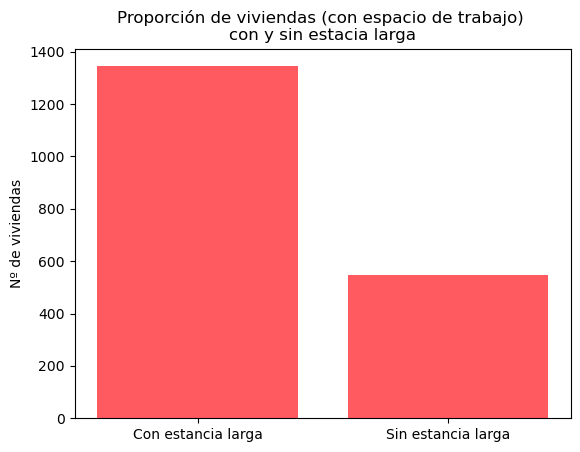

In [22]:
# Nº de viviendas (con espacio de trabajo) con y sin estancia larga
n_long_stays = len(df_long_stays)
n_no_long_stays = len(df_no_long_stays)

# Gráfico de barras con la proporción de viviendas (con espacio de trabajo) con y sin estancia larga
plt.bar(['Con estancia larga', 'Sin estancia larga'], [n_long_stays, n_no_long_stays], color='#FF5A5F')

# Título y etiquetas de los ejes
plt.title('Proporción de viviendas (con espacio de trabajo) \ncon y sin estacia larga');
plt.ylabel('Nº de viviendas');

In [23]:
# Nº de viviendas con espacio de trabajo y sin estancia larga permitida por barrio
df_neighbourhood_no_long_stays = df_no_long_stays.groupby('neighbourhood_cleansed').agg({'id':'count'})
df_neighbourhood_no_long_stays = df_neighbourhood_no_long_stays.rename(columns={'id':'n_no_long_stays'})
df_neighbourhood_no_long_stays = df_neighbourhood_no_long_stays.reset_index().sort_values(by='n_no_long_stays', ascending=False) # Ordenar por el nº de viviendas

df_neighbourhood_no_long_stays.head(5)

,neighbourhood_cleansed,n_no_long_stays
7,De Baarsjes - Oud-West,72
8,De Pijp - Rivierenbuurt,54
17,Oud-Oost,47
4,Centrum-Oost,46
5,Centrum-West,43


<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Permitir la estancia a largo plazo podría ser una buena forma de atraer a más nómadas digitales.
<br><br>
Una estrategia efectiva sería sugerir a los host de estos barrios que permitan la estancia larga para atraer un mayor cantidad de nómadas digitales.
</div>

In [24]:
# Lista con los dos barrios con más oferta de viviendas con espacio de trabajo y sin estancia larga permitida para impactar en esas zonas
list_no_long_stays = df_neighbourhood_no_long_stays.head(2)

list_no_long_stays = list_no_long_stays.loc[:,'neighbourhood_cleansed']
list_no_long_stays = list_no_long_stays.tolist()

In [25]:
# Condición para filtrar por los dos barrios con más oferta de viviendas con espacio de trabajo y sin estancia larga permitida
cond_no_long_stays = df_no_ws['neighbourhood_cleansed'].isin(list_no_long_stays)

# Ordenar por precio y puntuación
df_no_long_stays = df_no_ws[cond_no_long_stays].sort_values(by=['price','review_scores_rating'], ascending=False)
# Viviendas con un mayor precio y puntuación
df_no_long_stays[['name','room_type','neighbourhood_cleansed','price','review_scores_rating']].head(10)

,name,room_type,neighbourhood_cleansed,price,review_scores_rating
3582,Amazing apartment with roof terrace in Amsterd...,Entire home/apt,De Baarsjes - Oud-West,430.0,4.90
1805,Luxury double floor XXL home in the city centre!,Entire home/apt,De Baarsjes - Oud-West,429.0,5.00
2676,Canal view apartment with private balcony,Entire home/apt,De Pijp - Rivierenbuurt,427.0,3.90
2677,Penthouse spacious apartment with canal view,Entire home/apt,De Pijp - Rivierenbuurt,418.0,3.75
2086,Lovely apartment at the water with a sunny bal...,Entire home/apt,De Baarsjes - Oud-West,416.0,4.75
1692,Ruim en licht appartement Amsterdam Oud-West,Entire home/apt,De Baarsjes - Oud-West,413.0,4.88
1875,ONE OF A KIND 2STORY DUTCH TOWN HOUSE WITH PATIO,Entire home/apt,De Baarsjes - Oud-West,400.0,4.87
1439,"Designed Penthouse, Amsterdam city center",Entire home/apt,De Baarsjes - Oud-West,400.0,4.68
1488,Modern 2-bedroom Apartment in trendy A'dam West!,Entire home/apt,De Baarsjes - Oud-West,400.0,4.61
1068,B&B Cozy Watervilla Amsterdam,Entire home/apt,De Baarsjes - Oud-West,400.0,4.50


In [26]:
# Distribución de los tipos de habitación de las viviendas con espacio de trabajo, pero que no cuentan con estancia larga permitida
df_no_long_stays['room_type'].value_counts().to_frame()

,room_type
Entire home/apt,424
Private room,155
Hotel room,10
Shared room,2


<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Dado que los alojamientos enteros y los apartamentos representan la mayor proporción dentro de este grupo (72%), sería una estrategia acertada enfocar los esfuerzos en impactar a estos tipos de habitaciones.
</div>

### **2.2 - Wifi rápido**

In [27]:
# Condición para filtrar por las viviendas (con espacio de trabajo) con y sin wifi rápido
cond_fast_wifi = df_ws['amenities'].str.contains('Fast wifi', regex=False, case=False)

df_fast_wifi = df_ws[cond_fast_wifi] # Dataframe con wifi rápido
df_no_fast_wifi = df_ws[-cond_fast_wifi] # Dataframe sin wifi rápido

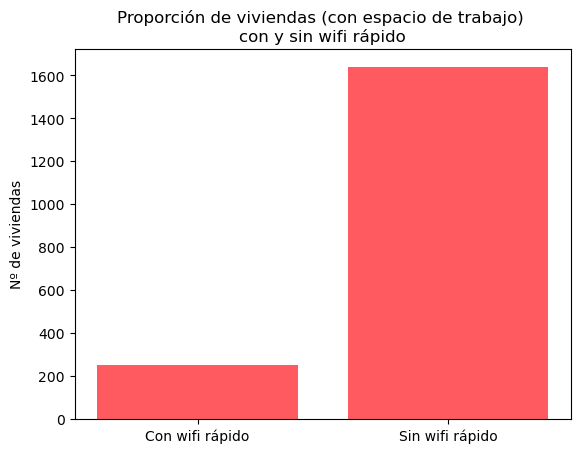

In [28]:
# Nº de viviendas (con espacio de trabajo) con y sin wifi rápido
n_fast_wifi = len(df_fast_wifi)
n_fast_no_wifi = len(df_no_fast_wifi)

# Gráfico de barras con la proporción de viviendas (con espacio de trabajo) con y sin wifi rápido
plt.bar(['Con wifi rápido', 'Sin wifi rápido'], [n_fast_wifi, n_fast_no_wifi], color='#FF5A5F')

# Título y etiquetas de los ejes
plt.title('Proporción de viviendas (con espacio de trabajo) \ncon y sin wifi rápido')
plt.ylabel('Nº de viviendas');

In [29]:
# Nº de viviendas con espacio de trabajo y sin wifi rápido
df_neighbourhood_no_fast_wifi = df_no_fast_wifi.groupby('neighbourhood_cleansed').agg({'id':'count'})
df_neighbourhood_no_fast_wifi = df_neighbourhood_no_fast_wifi.rename(columns={'id':'n_no_fast_wifi'})
df_neighbourhood_no_fast_wifi = df_neighbourhood_no_fast_wifi.reset_index().sort_values(by='n_no_fast_wifi', ascending=False) # Ordenar por el nº de viviendas

df_neighbourhood_no_fast_wifi.head(5)

,neighbourhood_cleansed,n_no_fast_wifi
7,De Baarsjes - Oud-West,224
5,Centrum-West,194
8,De Pijp - Rivierenbuurt,194
4,Centrum-Oost,137
20,Westerpark,118


<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Mejorar la conexión wifi podría ser una buena forma de atraer a más nómadas digitales.
<br><br>
Una estrategia efectiva sería sugerir a los host de estos barrios que mejoren la conexión wifi para atraer un mayor cantidad de nómadas digitales y que lo especifiquen en sus descripciones del alojamiento.
</div>

In [30]:
# Lista con los tres barrios con más oferta de viviendas con espacio de trabajo y sin wifi rápido para impactar en esas zonas
list_no_fast_wifi = df_neighbourhood_no_fast_wifi.head(3)

list_no_fast_wifi = list_no_fast_wifi.loc[:,'neighbourhood_cleansed']
list_no_fast_wifi = list_no_fast_wifi.tolist()

In [31]:
# Condición para filtrar por los tres barrios con más oferta de viviendas con espacio de trabajo y sin wifi rápido
cond_no_fast_wifi = df_ws['neighbourhood_cleansed'].isin(list_no_fast_wifi)

# Ordenar por precio y puntuación
df_no_fast_wifi = df_ws[cond_no_fast_wifi].sort_values(by=['price','review_scores_rating'], ascending=False)
# Viviendas que tienen un mayor precio y puntuación
df_no_fast_wifi[['name','room_type','neighbourhood_cleansed','price','review_scores_rating']].head(10)

,name,room_type,neighbourhood_cleansed,price,review_scores_rating
398,Spacious design townhouse with garden,Entire home/apt,De Baarsjes - Oud-West,449.0,4.97
2169,Spacious apartment with balcony - central loca...,Entire home/apt,De Baarsjes - Oud-West,449.0,4.77
1957,Sanitized! AirCon Penthouse w/view on Royal Pa...,Entire home/apt,Centrum-West,446.0,4.68
1700,Heart Of Amsterdam Double Balcony Mesh Wifi Suite,Entire home/apt,De Pijp - Rivierenbuurt,445.0,4.83
2265,Big loft with most beautiful views in city cen...,Entire home/apt,Centrum-West,443.0,5.00
2567,Central spacious & light appartement with terrace,Entire home/apt,De Baarsjes - Oud-West,443.0,4.36
3592,"2 bedrooms + Sauna, central apartment",Entire home/apt,De Baarsjes - Oud-West,440.0,5.00
3833,Great house with patio near the Vondelpark,Entire home/apt,De Baarsjes - Oud-West,439.0,4.67
3030,"Heerlijk huis, Central Pijp area",Entire home/apt,De Pijp - Rivierenbuurt,428.0,4.90
2826,Residences | 4-Bedrooms | Serviced Apartment,Entire home/apt,De Pijp - Rivierenbuurt,426.0,4.80


<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Para optimizar aún más la campaña, se podría focalizar en aquellas viviendas sin wifi rápido, y que ofrecen más rentabilidad y cuentan con mejor puntuación. De nuevo, con foco en los barrios más rentables y con mayor volumen.
</div>

### **2.3 - Wifi**

In [32]:
# Condición para filtrar por las viviendas con espacio de trabajo y sin wifi
cond_wifi = df_ws['amenities'].str.contains('Wifi', regex=False, case=False)

df_wifi = df_ws[cond_wifi] # Dataframe con wifi
df_no_wifi = df_ws[-cond_wifi] # Dataframe sin wifi

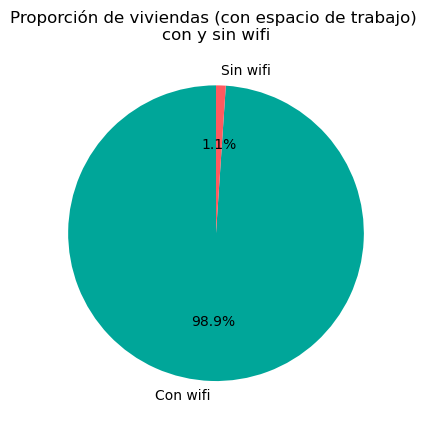

In [33]:
# Nº de viviendas (con espacio de trabajo) con y sin wifi
n_wifi = len(df_wifi)
n_no_wifi = len(df_no_wifi)

# Gráfico circular con la proporción de viviendas (con espacio de trabajo) con y sin wifi
plt.pie([n_wifi, n_no_wifi], labels=['Con wifi', 'Sin wifi'], autopct='%1.1f%%', startangle=90, colors=['#00A699','#FF5A5F'])

# Título del gráfico
plt.title('Proporción de viviendas (con espacio de trabajo) \ncon y sin wifi');

In [34]:
# Viviendas con espacio de trabajo y sin wifi que tienen un mayor precio y puntuación
df_no_wifi = df_no_wifi[['name','room_type','neighbourhood_cleansed','price','review_scores_rating']].sort_values(by='price', ascending=False)
df_no_wifi.head(10)

,name,room_type,neighbourhood_cleansed,price,review_scores_rating
2843,Extra Large Room · Extra Large Room · Extra La...,Private room,Zuid,442.0,4.69
3186,Sir Deluxe Room | Sir Adam Hotel,Private room,Oud-Noord,379.0,5.00
2441,Spacious apartment with garden,Entire home/apt,De Baarsjes - Oud-West,350.0,4.82
2144,"The SilhoueT, barge nearby the Amsterdam City",Entire home/apt,Westerpark,330.0,4.54
2842,Medium Triple Twin · Medium Triple Twin · Medi...,Private room,Zuid,321.0,4.86
2963,Luxurious 2 bedroom apartment - Vibrant location,Entire home/apt,De Pijp - Rivierenbuurt,320.0,4.33
2840,Medium Triple Room · Medium Triple Room · Medi...,Private room,Zuid,319.0,4.31
3482,"Prachtige moderne woning nabij Centrum,free pa...",Entire home/apt,Noord-West,300.0,5.00
2844,Medium Double Room · Medium Double Room · Medi...,Private room,Zuid,266.0,5.00
3934,Schitterend appartement met patio aan kanaal,Entire home/apt,De Baarsjes - Oud-West,259.0,5.00


<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Contar con wifi podría ser una buena forma de atraer a más nómadas digitales.
<br><br>
Una estrategia efectiva sería sugerir a los host de estas viviendas que instalen wifi para atraer un mayor cantidad de nómadas digitales. Si bien es cierto que representan un porcentaje muy pequeño del total, se podría realizar la recomendación para sacar la máxima rentabilidad.
</div>

---
## **3 - Conclusiones**

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
Tras un amplio análisis, se ha decidido enfocar en aquellos barrios y tipologías de vivienda que puedan reportar un mayor beneficio. Es por eso que se han analizado en profundidad los apartamentos enteros en el barrio de Oud-West y Centrum West, que son donde se concentran el mayor nº de alojamientos con espacio de trabajo y son dos de los cinco barrios más caros. Además, se han definido qué mejoras pueden aplicar estos host para incrementar sus reservas y ocupaciones medias: incluir los servicios que más interesan a los nativos digitales.
</div>

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
De esta manera, se proponer llevar a cabo acciones a dos niveles:
    
- A todo el clúster de interés (estancia larga, wifi rápido y wifi): acciones orgánicas sin coste o con coste muy bajo como emailing o comunicaciones one-to-one con los hosts.
    
- Al top 10 del clúster: inversiones a definir con el equipo de marketing enfocadas a su fidelización y mejora de la calidad de los alojamientos que ofertan en nuestra plataforma.
</div>

<div style="border: 5px solid #FF5A5F; padding: 20px; font-size: 16px; background-color: #FF5A5F33; font-family: 'Nunito', sans-serif;">
En caso de tener acceso a más datos, resultaría interesante contar con información sobre los servicios que hay en un radio cercano de los alojamientos con espacio de trabajo. Un nómada digital busca estar conectado y busca la libertad de poder trabajar desde donde quiera, con la mayor cantidad de servicios a su disposición. Cafés cercanos, restaurantes o parques serían algunos de los servicios que serían relevantes conocer si existen en la cercanía. 
<br><br>
A su vez, también sería interesante analizar más servicios ofrecidos por los hosts, como por ejemplo una cocina totalmente equipada para poder teletrabajar desde la comodidad del alojamiento y poder cocinarse uno mismo.
</div>